In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("height-weight.csv")

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

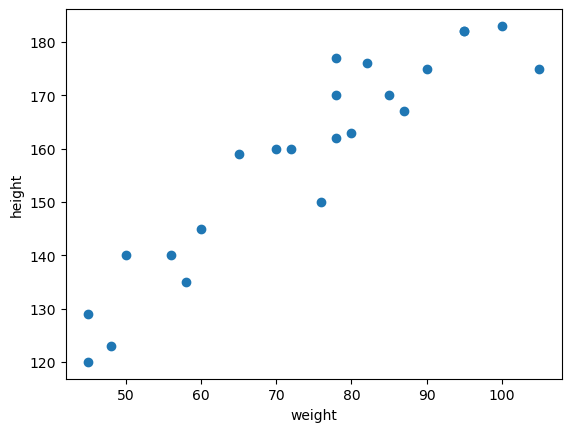

In [4]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("weight")
plt.ylabel("height")

In [5]:
# dvide dataset into independent and dependetn
X = df[['Weight']]
y = df['Height']
#making X 2d so that no error is there  in scaler , expects 2d array
type(X)

pandas.core.frame.DataFrame

In [6]:
#train test split
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)
type(X_train)

pandas.core.frame.DataFrame

In [8]:
X.shape

(23, 1)

In [9]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [10]:
# standardize input data
from sklearn.preprocessing import StandardScaler


In [11]:
scaler = StandardScaler()
type(X_train)

pandas.core.frame.DataFrame

In [12]:
X_train = scaler.fit_transform(X_train)

In [13]:
type(X_train)

numpy.ndarray

In [14]:
X_test = scaler.transform(X_test)

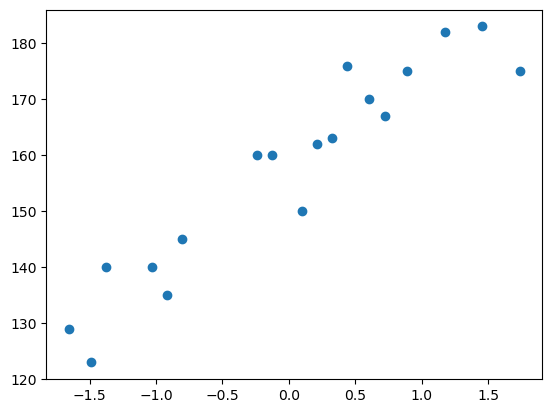

In [15]:
plt.scatter(X_train,y_train)

In [16]:
#train the model
from sklearn.linear_model import LinearRegression

In [17]:
regressor = LinearRegression()

In [18]:
regressor.fit(X_train,y_train)

LinearRegression()

In [19]:
print("slope or coeff of weight",regressor.coef_)
print("intercept",regressor.intercept_)
#one inde feature so one slope / w

slope or coeff of weight [17.03440872]
intercept 157.5


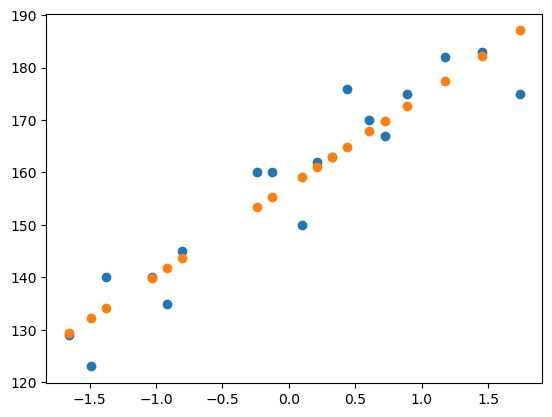

In [20]:
plt.scatter(X_train,y_train)
plt.scatter(X_train, regressor.predict(X_train))

In [21]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

In [22]:
y_pred_test = regressor.predict(X_test)

In [23]:
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

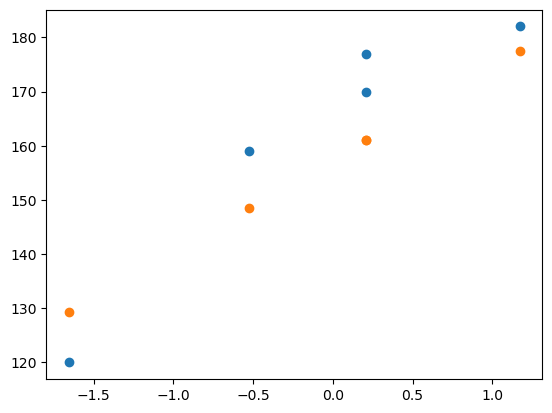

In [24]:
plt.scatter(X_test,y_test)
plt.scatter(X_test,regressor.predict(X_test))

In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [26]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)

In [27]:
print(mse)
print(mae)
print(rmse)

109.77592599051654
9.822657814519227
10.477400726827076


In [28]:
from sklearn.metrics import r2_score

In [29]:
score = r2_score(y_test,y_pred_test)

In [30]:
print(score)

0.7769869860423441


In [31]:
## for a new test point we need to get the scaled value and from it get the output
scaled_weight = scaler.transform([[80]])
scaled_weight

C:\Users\thaku\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [32]:
#predict
print(regressor.predict(scaled_weight))

[163.01076266]


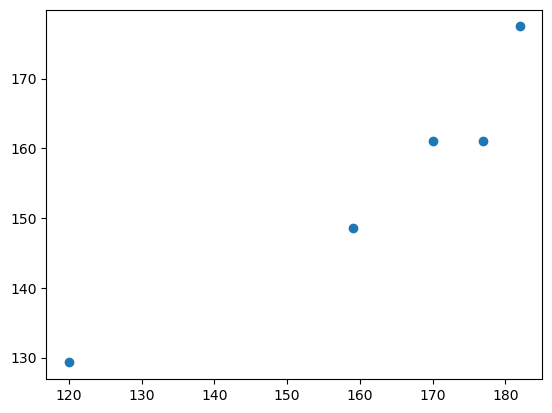

In [33]:
## assumptions if the model is actually good

#plot a scatter plot for prediction
plt.scatter(y_test,y_pred_test)

## if this scatter plot is lineraly distrubted then well job done

In [34]:
## residuals
res = y_test - y_pred_test

In [35]:
res

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

C:\Users\thaku\AppData\Local\Temp\ipykernel_8732\2342524895.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res,kde = True)


<Axes: xlabel='Height', ylabel='Density'>

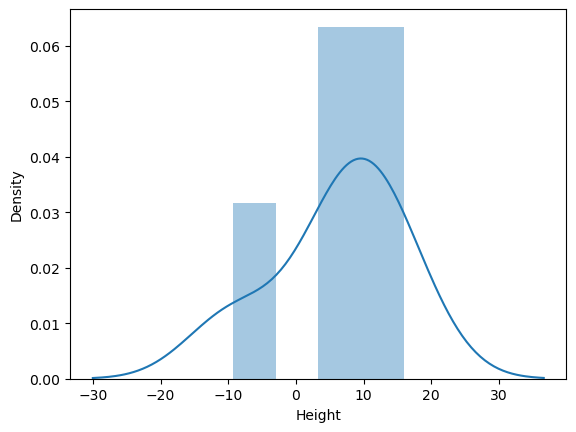

In [36]:
import seaborn as sns
sns.distplot(res,kde = True)

In [37]:
## residualls in normal dist so good model

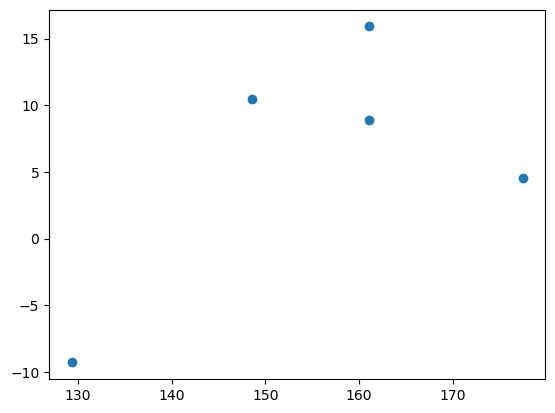

In [38]:
## scatter between predictions and residuals
plt.scatter(y_pred_test,res)

In [39]:
# should be a uniform dist